### Se importan las librerías necesarias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Se definen funciones importantes

In [4]:
# Esta función regresa las graficas de los puntos de los perfiles
# obtenidos con el software Tracker.


def scatter(perfil, concentracion, haz):
    perfil.plot.scatter(x="x",
                        y="luma",
                        grid=True,
                        title=f"Perfil de Intensidad {haz} para Concentración\ngrenetina/agua {concentracion}:1",
                        ylabel="Intensidad Lumínica",
                        xlabel="Posición [cm]")
    plt.savefig(f'graficas/Intensidad_{haz}_{concentracion}1.png')
    plt.show()

In [5]:
# Esta función obtiene la intensidad de un haz Gaussiano


def gaussian_beam(x, a, m, w, offs):
    return a * np.exp(-2 * (x - m) ** 2 / w ** 2) + offs

In [6]:
# Esta función toma los datos del perfil, la función a ajustar, la
# concentración que se analiza y el tipo de haz, ya sea incidente o 
# reflejado.


def graficas(perfil, funcion, concentracion, haz):
    
    # Se definen los ejes x y y
    x = perfil["x"]
    y = perfil["luma"]
    
    # Se hace el ajuste de la curva
    popt, _ = curve_fit(funcion, x, y, maxfev=4000)
    
    # Se extraen los parametros ajustados a, m, w, offs
    a, m, w, offs = popt
    
    # Se imprime la forma de la ecuación con los parámetros obtenidos
    # junto con sus errores
    print("------------------Forma de la Ecuación---------------------\n")
    print(f'$I(x) = {round(a, 3)}e^(-2(x - {round(m, 3)})^2 / {round(w, 3)}^2) + {round(offs, 3)}$')
    print("\n----------------Parámetros de la Ecuación------------------\n")
    print(f'a = {round(a, 3)} +/- {round(np.sqrt(np.diag(_))[0], 3)}\nm = {round(m, 3)} +/- {round(np.sqrt(np.diag(_))[1], 3)}\nw = {round(w, 3)} +/- {round(np.sqrt(np.diag(_))[2], 3)}\noffs = {round(offs, 3)} +/- {round(np.sqrt(np.diag(_))[3], 3)}\n')
    print(f'err(I) = {round(np.sqrt(sum(np.power(np.diag(_), 2))), 3)}\n')
    print("\n---------------Error Porcentual de Parámetros--------------\n")
    print(f'err(a) = {round(round(np.sqrt(np.diag(_))[0], 3) / round(a, 3) * 100, 3)}%\nerr(m) = {round(round(np.sqrt(np.diag(_))[1], 3) / round(m, 3) * 100, 3)}%\nerr(w) = {round(round(np.sqrt(np.diag(_))[2], 3) / round(w, 3) * 100, 3)}%\nerr(offs) = {round(round(np.sqrt(np.diag(_))[3], 3) / round(offs, 3) * 100, 3)}%\n')
    
    
    # Se muestran las gráficas
    # Se grafican los puntos obtenidos del experimento
    plt.scatter(x, y, label="Datos\nExperimentales")
    
    # Se crea un array con el dominio de x
    x_line = np.arange(min(x), max(x), 0.01)
    
    # Se evalua la función en el dominio x_line
    y_line = funcion(x_line, a, m, w, offs)
    
    # Se grafica el ajuste y_line
    plt.plot(x_line, y_line, '--', color='red', label="Ajuste:\n$ae^{-2(x-m)^2/w^2}+offs$")
    plt.xlabel("Posición [cm]")
    plt.ylabel("Intensidad Lumínica")
    plt.title(f"Ajuste Gaussiano de Intensidad de Haz {haz} para\nConcentración grenetina/agua {concentracion}:1")
    plt.legend()
    plt.grid()
    
    # Se guarda la imagen en el directorio "graficas"
    plt.savefig(f"graficas/ajuste_intensidad_{haz}_{concentracion}1.png")
    plt.show()

In [7]:
# Esta función regresa los coeficientes de atenuación para las
# distintas concentraciones grenetina/agua.


def coeficiente_de_atenuacion(errores, perfil_incidente,perfil_reflejado, incidente, reflejado):
    d_1 = abs(perfil_incidente["y"][0])
    d_2 = abs(perfil_reflejado["y"][0])
    coef = round(1 / (d_1 + d_2) * np.log(incidente / reflejado), 3)
    err = round(np.sqrt((2 / (d_1 + d_2) ** 2 * np.log(incidente / reflejado)) ** 2 * errores[0] ** 2 + (2 / (d_1 + d_2) ** 2 * np.log(incidente / reflejado)) ** 2 * errores[1] ** 2 + (1 / (d_1 + d_2) * 1 / incidente) ** 2 * errores[2] ** 2 + (1 / (d_1 + d_2) * 1 / reflejado) ** 2 * errores[3] ** 2), 3)
    return coef, err

### Se cargan los datos resultantes de las mediciones en Tracker

In [8]:
# Se leen los perfiles y se guardan en sus respectivas variables

perfil_incidencia_11 = pd.read_csv("../data/perfil_incidente_11.csv")
perfil_incidencia_31 = pd.read_csv("../data/perfil_incidente_31.csv")
perfil_incidencia_61 = pd.read_csv("../data/perfil_incidente_61.csv")
perfil_reflejado_11 = pd.read_csv("../data/perfil_reflejado_11.csv")
perfil_reflejado_31 = pd.read_csv("../data/perfil_reflejado_31.csv")
perfil_reflejado_61 = pd.read_csv("../data/perfil_reflejado_61.csv")

## Graficas de los puntos de intensidad obtenidos para las diferentes concentraciones

##### Medio con concentración grenetina/agua 1:1

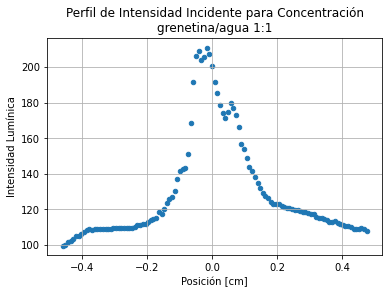

In [9]:
scatter(perfil_incidencia_11, 1, "Incidente")

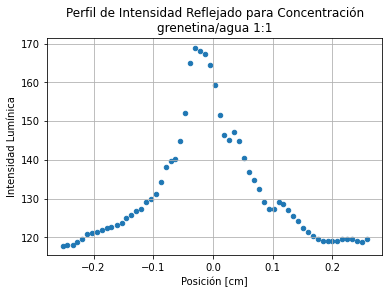

In [8]:
scatter(perfil_reflejado_11, 1, "Reflejado")

##### Medio con concentración grenetina/agua 3:1

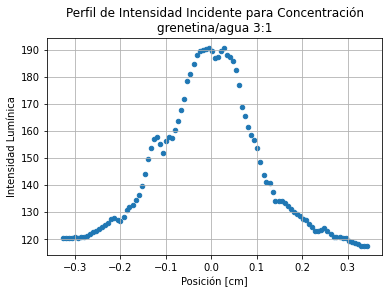

In [9]:
scatter(perfil_incidencia_31, 3, "Incidente")

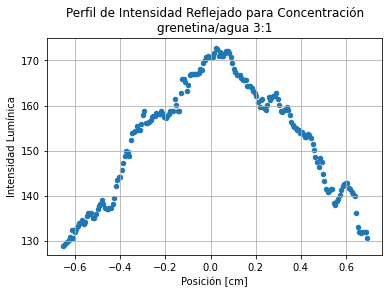

In [10]:
scatter(perfil_reflejado_31, 3, "Reflejado")

##### Medio con concentración grenetina/agua 6:1

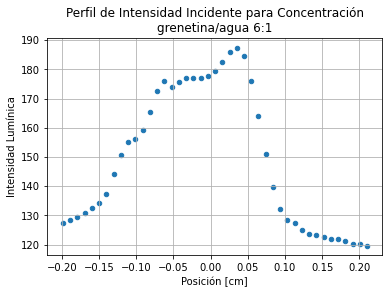

In [11]:
scatter(perfil_incidencia_61, 6, "Incidente")

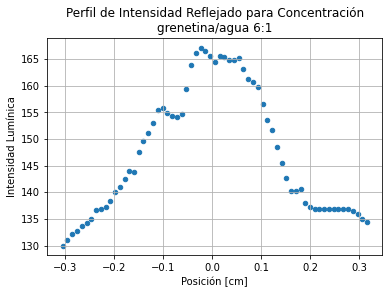

In [12]:
scatter(perfil_reflejado_61, 6, "Reflejado")

## Ajuste de los datos y obtención de parámetros de la curva gaussiana

$$I(x)=ae^{-(x-m)^2/w^2}+offs$$

##### Medio con concentración grenetina/agua 1:1

------------------Forma de la Ecuación---------------------

$I(x) = 88.103e^(-2(x - 0.002)^2 / 0.153^2) + 111.427$

----------------Parámetros de la Ecuación------------------

a = 88.103 +/- 2.361
m = 0.002 +/- 0.002
w = 0.153 +/- 0.005
offs = 111.427 +/- 0.933

err(I) = 5.644


---------------Error Porcentual de Parámetros--------------

err(a) = 2.68%
err(m) = 100.0%
err(w) = 3.268%
err(offs) = 0.837%



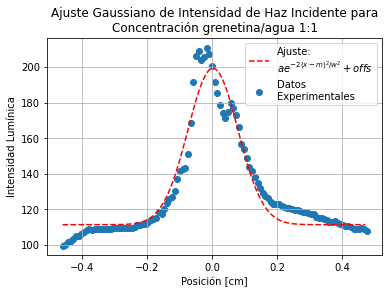

In [10]:
graficas(perfil_incidencia_11, gaussian_beam, 1, "Incidente")

------------------Forma de la Ecuación---------------------

$I(x) = 41.301e^(-2(x - -0.013)^2 / 0.103^2) + 121.191$

----------------Parámetros de la Ecuación------------------

a = 41.301 +/- 1.342
m = -0.013 +/- 0.002
w = 0.103 +/- 0.004
offs = 121.191 +/- 0.629

err(I) = 1.843


---------------Error Porcentual de Parámetros--------------

err(a) = 3.249%
err(m) = -15.385%
err(w) = 3.883%
err(offs) = 0.519%



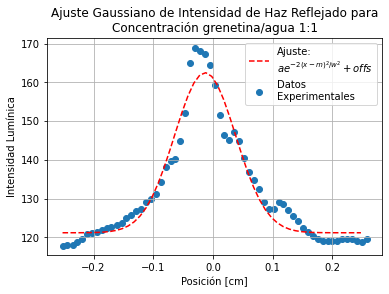

In [14]:
graficas(perfil_reflejado_11, gaussian_beam, 1, "Reflejado")

##### Medio con concentración grenetina/agua 3:1

------------------Forma de la Ecuación---------------------

$I(x) = 68.706e^(-2(x - -0.004)^2 / 0.177^2) + 121.036$

----------------Parámetros de la Ecuación------------------

a = 68.706 +/- 0.967
m = -0.004 +/- 0.001
w = 0.177 +/- 0.003
offs = 121.036 +/- 0.614

err(I) = 1.009


---------------Error Porcentual de Parámetros--------------

err(a) = 1.407%
err(m) = -25.0%
err(w) = 1.695%
err(offs) = 0.507%



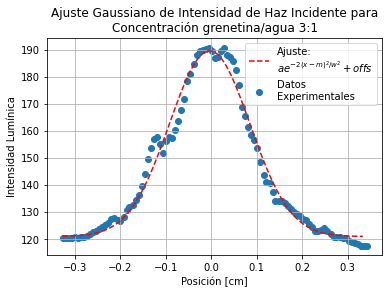

In [15]:
graficas(perfil_incidencia_31, gaussian_beam, 3, "Incidente")

------------------Forma de la Ecuación---------------------

$I(x) = 52.468e^(-2(x - 0.051)^2 / 0.833^2) + 116.393$

----------------Parámetros de la Ecuación------------------

a = 52.468 +/- 2.521
m = 0.051 +/- 0.003
w = 0.833 +/- 0.035
offs = 116.393 +/- 2.666

err(I) = 9.535


---------------Error Porcentual de Parámetros--------------

err(a) = 4.805%
err(m) = 5.882%
err(w) = 4.202%
err(offs) = 2.291%



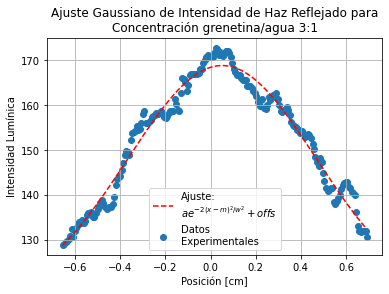

In [16]:
graficas(perfil_reflejado_31, gaussian_beam, 3, "Reflejado")

##### Medio con concentración grenetina/agua 6:1

------------------Forma de la Ecuación---------------------

$I(x) = 67.943e^(-2(x - -0.016)^2 / 0.162^2) + 116.737$

----------------Parámetros de la Ecuación------------------

a = 67.943 +/- 3.452
m = -0.016 +/- 0.003
w = 0.162 +/- 0.012
offs = 116.737 +/- 3.442

err(I) = 16.805


---------------Error Porcentual de Parámetros--------------

err(a) = 5.081%
err(m) = -18.75%
err(w) = 7.407%
err(offs) = 2.949%



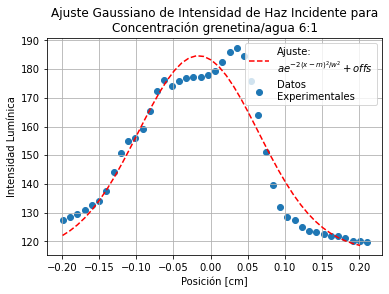

In [17]:
graficas(perfil_incidencia_61, gaussian_beam, 6, "Incidente")

------------------Forma de la Ecuación---------------------

$I(x) = 33.187e^(-2(x - 0.002)^2 / 0.216^2) + 133.078$

----------------Parámetros de la Ecuación------------------

a = 33.187 +/- 0.805
m = 0.002 +/- 0.002
w = 0.216 +/- 0.008
offs = 133.078 +/- 0.732

err(I) = 0.841


---------------Error Porcentual de Parámetros--------------

err(a) = 2.426%
err(m) = 100.0%
err(w) = 3.704%
err(offs) = 0.55%



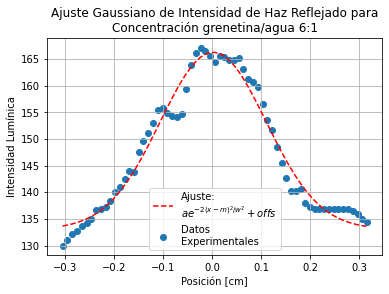

In [18]:
graficas(perfil_reflejado_61, gaussian_beam, 6, "Reflejado")

## Coeficiente de Atenuación

$$\mu=\frac{1}{d}\ln\left(\frac{I_0}{I}\right)$$

##### Se cargan las intensidades resultantes

In [19]:
# Del procedimento de bootstrap realizado en R, se obtuvieron los
# siguiente resultados para las intensidades del haz.

intensidad_haz_incidente_11 = 210.003
intensidad_haz_incidente_31 = 190.698
intensidad_haz_incidente_61 = 186.582
intensidad_haz_reflejado_11 = 168.318
intensidad_haz_reflejado_31 = 172.644
intensidad_haz_reflejado_61 = 166.798

Se muestran las intensidades con sus respectivos errores

In [39]:
print(f'Intensidad Incidente -> {intensidad_haz_incidente_11} +/- {5.644}\n\t\t\tError porcentual -> {round(5.644 / intensidad_haz_incidente_11 * 100, 3)}%')
print(f'Intensidad Incidente -> {intensidad_haz_incidente_31} +/- {1.843}\n\t\t\tError porcentual -> {round(1.843 / intensidad_haz_incidente_31 * 100, 3)}%')
print(f'Intensidad Incidente -> {intensidad_haz_incidente_61} +/- {1.009}\n\t\t\tError porcentual -> {round(1.009 / intensidad_haz_incidente_61 * 100, 3)}%')
print(f'Intensidad Incidente -> {intensidad_haz_reflejado_11} +/- {9.535}\n\t\t\tError porcentual -> {round(9.535 / intensidad_haz_reflejado_11 * 100, 3)}%')
print(f'Intensidad Incidente -> {intensidad_haz_reflejado_31} +/- {4.805}\n\t\t\tError porcentual -> {round(4.805 / intensidad_haz_reflejado_31 * 100, 3)}%')
print(f'Intensidad Incidente -> {intensidad_haz_reflejado_61} +/- {0.841}\n\t\t\tError porcentual -> {round(0.841 / intensidad_haz_reflejado_61 * 100, 3)}%')

Intensidad Incidente -> 210.003 +/- 5.644
			Error porcentual -> 2.688%
Intensidad Incidente -> 190.698 +/- 1.843
			Error porcentual -> 0.966%
Intensidad Incidente -> 186.582 +/- 1.009
			Error porcentual -> 0.541%
Intensidad Incidente -> 168.318 +/- 9.535
			Error porcentual -> 5.665%
Intensidad Incidente -> 172.644 +/- 4.805
			Error porcentual -> 2.783%
Intensidad Incidente -> 166.798 +/- 0.841
			Error porcentual -> 0.504%


##### Se obtienen los coeficientes de atenuación para las diferentes concentraciones

##### Medio con concentración grenetina/agua 1:1

In [40]:
atenuacion_11, err_atenuacion_11 = coeficiente_de_atenuacion([0.05, 0.05, 5.644, 9.535], perfil_incidencia_11,
                                          perfil_reflejado_11,
                                          intensidad_haz_incidente_11,
                                          intensidad_haz_reflejado_11)
print(f'Coeficiente de atenuación para gelatina 1:1 -> {atenuacion_11} +/- {err_atenuacion_11}')
print(f'\t\t\t\tError Porcentual -> {err_atenuacion_11 / atenuacion_11 * 100}%')

Coeficiente de atenuación para gelatina 1:1 -> 0.104 +/- 0.03
				Error Porcentual -> 28.84615384615385%


##### Medio con concentración grenetina/agua 3:1

In [43]:
atenuacion_31, err_atenuacion_31 = coeficiente_de_atenuacion([0.05, 0.05, 1.843, 4.805], perfil_incidencia_31,
                                          perfil_reflejado_31,
                                          intensidad_haz_incidente_31,
                                          intensidad_haz_reflejado_31)
print(f'Coeficiente de atenuación para gelatina 3:1 -> {atenuacion_31} +/- {err_atenuacion_31}')
print(f'\t\t\t\tError Porcentual -> {err_atenuacion_31 / atenuacion_31 * 100}%')

Coeficiente de atenuación para gelatina 3:1 -> 0.033 +/- 0.01
				Error Porcentual -> 30.303030303030305%


##### Medio con concentración grenetina/agua 6:1

In [44]:
atenuacion_61, err_atenuacion_61 = coeficiente_de_atenuacion([0.05, 0.05, 1.009, 0.841], perfil_incidencia_61,
                                          perfil_reflejado_61,
                                          intensidad_haz_incidente_61,
                                          intensidad_haz_reflejado_61)
print(f'Coeficiente de atenuación para gelatina 6:1 -> {atenuacion_61} +/- {err_atenuacion_61}')
print(f'\t\t\t\tError Porcentual -> {err_atenuacion_61 / atenuacion_61 * 100}%')

Coeficiente de atenuación para gelatina 6:1 -> 0.077 +/- 0.009
				Error Porcentual -> 11.688311688311687%
